In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils
import nanonets

In [2]:
def average_outputs(folder, N_stat, N_threads):

    values          = [pd.read_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means           = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns)
    means['Error']  = np.std(values,axis=0)[:,-2]/np.sqrt(50)

    means.to_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

def average_states(folder, N_stat, N_threads):

    values  = [pd.read_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means   = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns).round(3)
    
    means.to_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

# Combine output currents
average_outputs("radius_corr/data", 10 , 10)
average_outputs("resistance_corr/data", 10 , 10)
average_outputs("../step_input/1I_1O/data/", 10, 10)

# Combine states
average_states("radius_corr/data", 10 , 10)
average_states("resistance_corr/data", 10 , 10)
average_states("../step_input/1I_1O/data/", 10 , 10)

In [3]:
results         = pd.DataFrame()
results["t"]    = np.loadtxt("radius_corr/time.csv")[1:]*10**9
results['U']    = pd.read_csv("../step_input/1I_1O/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']

results["I"]    = pd.read_csv("../step_input/1I_1O/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["uI"]   = pd.read_csv("../step_input/1I_1O/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results["r_I"]  = pd.read_csv("radius_corr/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["r_uI"] = pd.read_csv("radius_corr/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results["R_I"]  = pd.read_csv("resistance_corr/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_uI"] = pd.read_csv("resistance_corr/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results

,t,U,I,uI,r_I,r_uI,R_I,R_uI
0,0.1,0.1,900.0,404.722127,1200.0,459.565012,1500.0,504.975247
1,0.2,0.1,1500.0,504.975247,1400.0,490.713766,900.0,404.722127
2,0.3,0.1,700.0,360.832371,1200.0,459.565012,600.0,335.857112
3,0.4,0.1,700.0,360.832371,900.0,404.722127,500.0,308.220700
4,0.5,0.1,1600.0,518.459256,1200.0,459.565012,800.0,383.666522
...,...,...,...,...,...,...,...,...
994,99.5,0.1,600.0,335.857112,1600.0,555.697760,1000.0,424.264069
995,99.6,0.1,1700.0,531.224999,700.0,360.832371,800.0,383.666522
996,99.7,0.1,1200.0,459.565012,1200.0,459.565012,900.0,404.722127
997,99.8,0.1,800.0,383.666522,1500.0,504.975247,800.0,383.666522


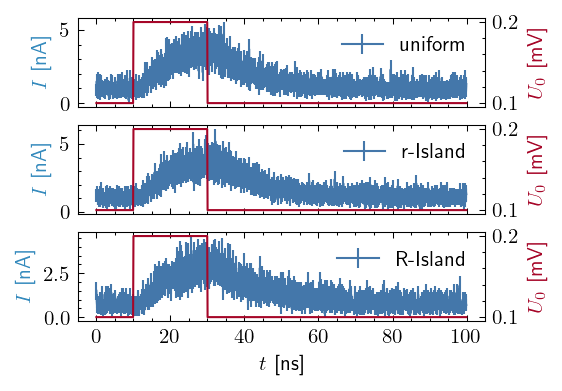

In [4]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    fig.set_figheight(fig.get_figheight())
    
    ax  = fig.add_subplot(3,1,1)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

    ax.errorbar(results['t'], results['I']/1000, results['uI']/1000, label='uniform')
    ax.set_xticklabels("")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.legend()

    ax  = fig.add_subplot(3,1,2)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['r_I']/1000, results['r_uI']/1000, label='r-Island')
    ax.set_xticklabels("")
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.legend()

    ax  = fig.add_subplot(3,1,3)
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'], c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    ax.errorbar(results['t'], results['R_I']/1000, results['R_uI']/1000, label='R-Island')
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_xlabel("$t$ [ns]")
    ax.legend()

    fig.savefig('plots/i_o_comp.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/i_o_comp.pdf', bbox_inches='tight', transparent=False)

MovieWriter ffmpeg unavailable; using Pillow instead.


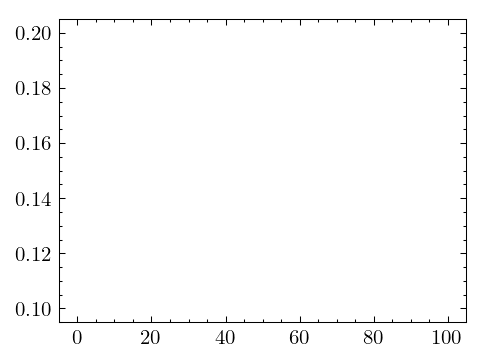

In [76]:
x   = results["t"].values
y   = results["U"].values

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    # line.axes.axis([xmin,xmax,ymin,ymax])
    
    return line,

with plt.style.context(["science","bright"]):

    fig     = plt.figure(dpi=150)
    ax      = fig.add_subplot()
    # ax.set_xlabel("$t$ [ns]")
    # ax.set_ylabel("$U_0$ [mV]")
    
    line,   = ax.plot(x, y, lw=3)
    ani     = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line], interval=50, repeat_delay=500)

ani.save("plots/input.gif")

In [14]:
dic = {
    "standard"      : pd.read_csv("../step_input/1I_1O/data/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "radius"        : pd.read_csv("radius_corr/data/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "resistance"    : pd.read_csv("resistance_corr/data/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv")
}

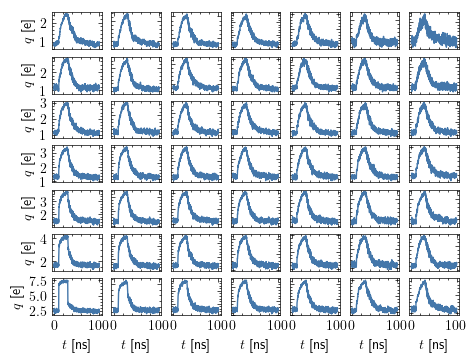

In [12]:
key = "standard"

with plt.style.context(["science","bright"]):

    fig, axs = plt.subplots(ncols=7, nrows=7)

    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1.5)

    i = 0

    for row in np.arange(6,-1,-1):
        for col in range(0,7):

            axs[row,col].plot(results["t"], dic[key][f"{i}"].values)
            # axs[row,col].set_ylim(0,8)

            # axs[row,col].set_ylim(0.2,11)
            # axs[row,col].set_yscale("log")

            if i >= 7:
                axs[row,col].set_xticklabels("")
            else:
                axs[row,col].set_xlabel("$t$ [ns]")

            if i % 7 != 0:
                axs[row,col].set_yticklabels("")
            else:
                axs[row,col].set_ylabel("$q$ [e]")

            i += 1

    # fig.savefig('plots/state_vs_time.svg', bbox_inches='tight', transparent=True)
    # fig.savefig('plots/state_vs_time.pdf', bbox_inches='tight', transparent=False)

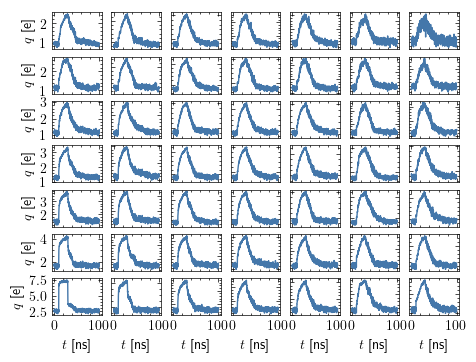

In [11]:
key = "radius"

with plt.style.context(["science","bright"]):

    fig, axs = plt.subplots(ncols=7, nrows=7)

    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1.5)

    i = 0

    for row in np.arange(6,-1,-1):
        for col in range(0,7):

            axs[row,col].plot(results["t"], dic[key][f"{i}"].values)
            # axs[row,col].set_ylim(0,8)
            # axs[row,col].set_ylim(0.2,11)
            # axs[row,col].set_yscale("log")

            if i >= 7:
                axs[row,col].set_xticklabels("")
            else:
                axs[row,col].set_xlabel("$t$ [ns]")

            if i % 7 != 0:
                axs[row,col].set_yticklabels("")
            else:
                axs[row,col].set_ylabel("$q$ [e]")

            i += 1

    # fig.savefig('plots/state_vs_time_radius.svg', bbox_inches='tight', transparent=True)
    # fig.savefig('plots/state_vs_time_radius.pdf', bbox_inches='tight', transparent=False)

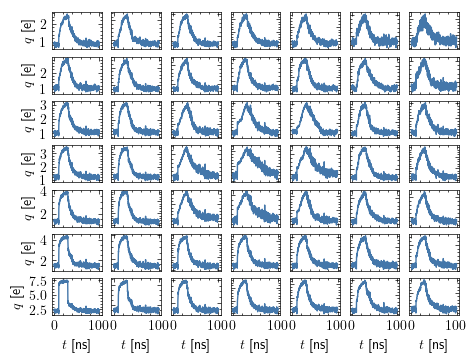

In [10]:
key = "resistance"

with plt.style.context(["science","bright"]):

    fig, axs = plt.subplots(ncols=7, nrows=7)

    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1.5)

    i = 0

    for row in np.arange(6,-1,-1):
        for col in range(0,7):

            axs[row,col].plot(results["t"], dic[key][f"{i}"].values)
            # axs[row,col].set_ylim(0,8)

            if i >= 7:
                axs[row,col].set_xticklabels("")
            else:
                axs[row,col].set_xlabel("$t$ [ns]")

            if i % 7 != 0:
                axs[row,col].set_yticklabels("")
            else:
                axs[row,col].set_ylabel("$q$ [e]")

            i += 1

    fig.savefig('plots/state_vs_time_resistance.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_time_resistance.pdf', bbox_inches='tight', transparent=False)

MovieWriter ffmpeg unavailable; using Pillow instead.


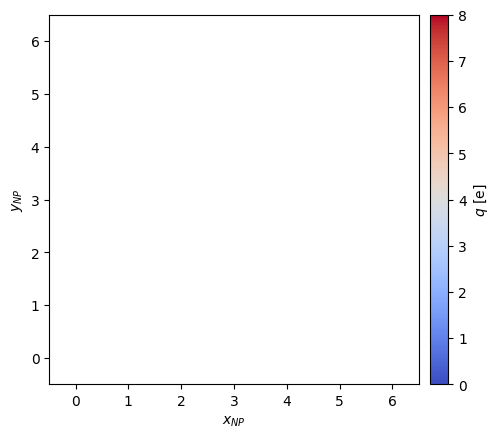

In [73]:
ani = nanonets_utils.animate_landscape(dic["standard"].values, 7 , 7,
                                       delay_between_frames=50, interpolation='bilinear', cbar_label='$q$ [e]',
                                       vmin=0, vmax=8)
ani.save("plots/state_animation.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


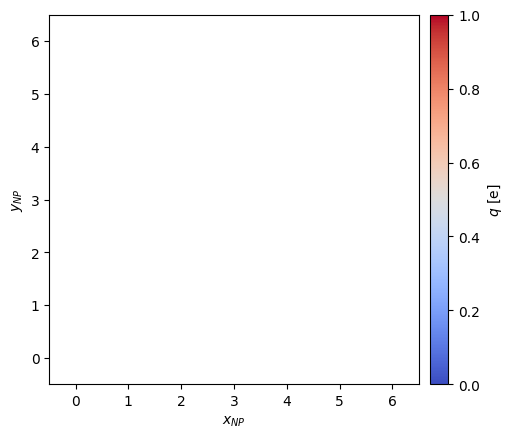

In [20]:
vals_scaled = (dic["standard"].values - np.min(dic["standard"].values, axis=0))/(np.max(dic["standard"].values, axis=0) - np.min(dic["standard"].values, axis=0))
ani = nanonets_utils.animate_landscape(vals_scaled, 7 , 7,
                                       delay_between_frames=50, interpolation='bilinear', cbar_label='$q$ [e]',
                                       vmin=0, vmax=1)
ani.save("plots/state_animation_s.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


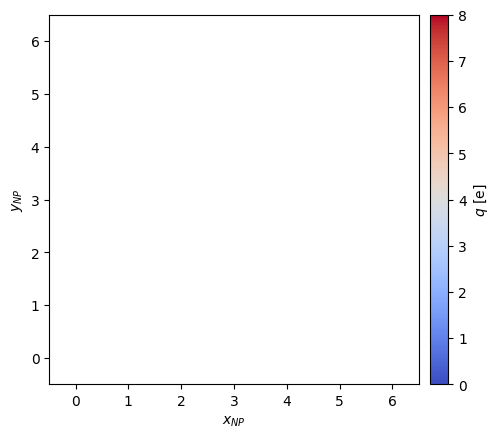

In [58]:
ani = nanonets_utils.animate_landscape(dic["radius"].values, 7 , 7,
                                       delay_between_frames=50, interpolation='bilinear', cbar_label='$q$ [e]',
                                       vmin=0, vmax=8)
ani.save("plots/state_animation_radius.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


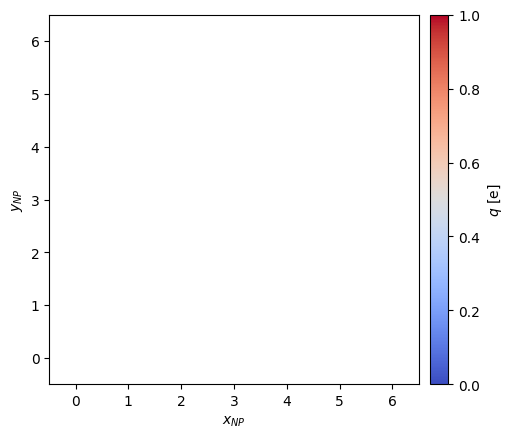

In [22]:
vals_scaled = (dic["radius"].values - np.min(dic["radius"].values, axis=0))/(np.max(dic["radius"].values, axis=0) - np.min(dic["radius"].values, axis=0))
ani = nanonets_utils.animate_landscape(vals_scaled, 7 , 7,
                                       delay_between_frames=50, interpolation='bilinear', cbar_label='$q$ [e]',
                                       vmin=0, vmax=1)
ani.save("plots/state_animation_radius_s.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


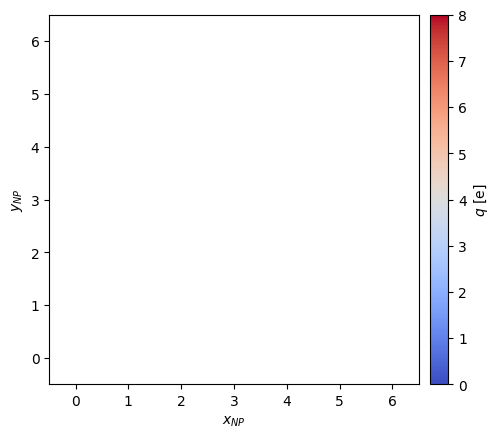

In [9]:
ani = nanonets_utils.animate_landscape(dic["resistance"].values, 7 , 7,
                                       delay_between_frames=50, interpolation='bilinear', cbar_label='$q$ [e]',
                                       vmin=0, vmax=8)
ani.save("plots/state_animation_resistance.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


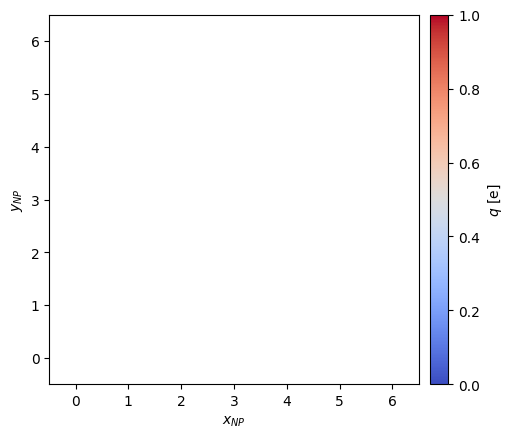

In [21]:
vals_scaled = (dic["resistance"].values - np.min(dic["resistance"].values, axis=0))/(np.max(dic["resistance"].values, axis=0) - np.min(dic["resistance"].values, axis=0))
ani = nanonets_utils.animate_landscape(vals_scaled, 7 , 7,
                                       delay_between_frames=50, interpolation='bilinear', cbar_label='$q$ [e]',
                                       vmin=0, vmax=1)
ani.save("plots/state_animation_resistance_s.gif")

In [128]:
# Example: Cubic Network
network_topology = "cubic"

# Network Parameter
topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[6,6,0]]
}

# Network Class Object
np_network_cubic = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

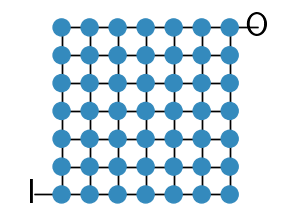

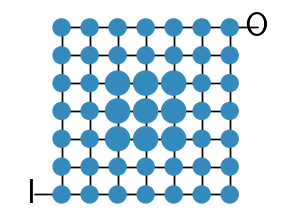

In [89]:
node_size = 150

fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
fig.savefig('plots/network_plot.svg', bbox_inches='tight', transparent=True)
fig.savefig('plots/network_plot.pdf', bbox_inches='tight', transparent=False)

node_size = np.repeat(150, 51)

for i in [16,17,18,23,24,25,30,31,32]:
    node_size[i] = 300

fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
fig.savefig('plots/network_plot_radius.svg', bbox_inches='tight', transparent=True)
fig.savefig('plots/network_plot_radius.pdf', bbox_inches='tight', transparent=False)